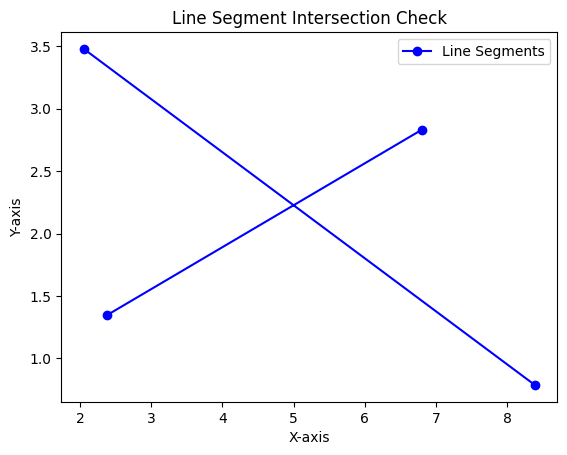

In [66]:
#Generating 2 Random Lines
import random
import matplotlib.pyplot as plt

def generate_random_line():
    """
    Function to generate a random line segment.
    Returns a tuple of two points representing the line segment.
    """
    return ((random.uniform(0, 10), random.uniform(0, 10)), (random.uniform(0, 10), random.uniform(0, 10)))

def plot_lines(segments):
    """
    Function to plot line segments and highlight the intersection point if they intersect.
    """
    x = []
    y = []

    for segment in segments:
        x.extend([segment[0][0], segment[1][0], None])
        y.extend([segment[0][1], segment[1][1], None])

    plt.plot(x, y, marker='o', color='blue', label='Line Segments')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Line Segment Intersection Check')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Generate two random line segments
    segment1 = generate_random_line()
    segment2 = generate_random_line()
    # Plot the line segments
    plot_lines([segment1, segment2])


Line Segments: ((2.3727384062835655, 1.3454030264560957), (6.79986777259842, 2.831154713439598)) ((8.389738659027678, 0.7881802159826623), (2.0516686915549744, 3.4792966616197596))
Do the line segments intersect? True

 Running Time is:  8.8215e-06


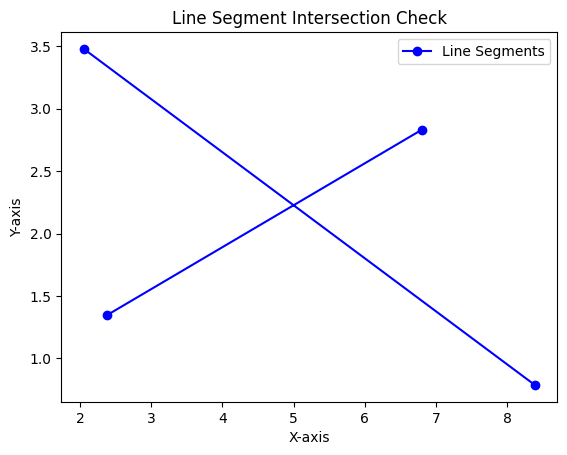

In [67]:
#Lines Intersect using ccw

import random
import matplotlib.pyplot as plt
import time

def ccw(A, B, C):
    """
    Function to determine the orientation of three points (A, B, C).
    Returns:
    -1 if the points are clockwise
    0 if the points are collinear
    1 if the points are counterclockwise
    """
    val = (B[1] - A[1]) * (C[0] - B[0]) - (B[0] - A[0]) * (C[1] - B[1])
    if val == 0:
        return 0
    return 1 if val > 0 else -1

def do_intersect(seg1, seg2):
    """
    Function to check if two line segments intersect using the CCW test.
    Each line segment is represented by a tuple of two points.
    Returns True if the segments intersect, False otherwise.
    """
    A, B = seg1
    C, D = seg2

    # Check for orientation
    orientation1 = ccw(A, B, C)
    orientation2 = ccw(A, B, D)
    orientation3 = ccw(C, D, A)
    orientation4 = ccw(C, D, B)

    # General case (segments are not collinear)
    if orientation1 != orientation2 and orientation3 != orientation4:
        return True

    # Special cases (segments are collinear and overlap)
    if orientation1 == orientation2 == orientation3 == 0:
        if (
            min(A[0], B[0]) <= C[0] <= max(A[0], B[0])
            or min(A[0], B[0]) <= D[0] <= max(A[0], B[0])
            or min(C[0], D[0]) <= A[0] <= max(C[0], D[0])
            or min(C[0], D[0]) <= B[0] <= max(C[0], D[0])
        ):
            return True

    return False

def plot_lines(segments, intersection_result):
    """
    Function to plot line segments and highlight the intersection point if they intersect.
    """
    x = []
    y = []

    for segment in segments:
        x.extend([segment[0][0], segment[1][0], None])
        y.extend([segment[0][1], segment[1][1], None])

    plt.plot(x, y, marker='o', color='blue', label='Line Segments')

    if intersection_result:
        intersection_point = intersection_result
        # plt.scatter(*intersection_point, color='red', label='Intersection Point')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Line Segment Intersection Check')
    plt.legend()
    plt.show()

if __name__ == "__main__":

    # Check for intersection
    start = time.time()
    intersection_result = do_intersect(segment1, segment2)
    end = time.time()
    # Display the result
    print("Line Segments:", segment1, segment2)
    print("Do the line segments intersect?", intersection_result)
    print("\n Running Time is: ", round((end-start),10))

    # Plot the line segments
    plot_lines([segment1, segment2], intersection_result)



Line Segments: (2.3727384062835655, 1.3454030264560957) (6.79986777259842, 2.831154713439598) (8.389738659027678, 0.7881802159826623) (2.0516686915549744, 3.4792966616197596)
Do the line segments intersect? True

 Running Time is:  6.9141e-06


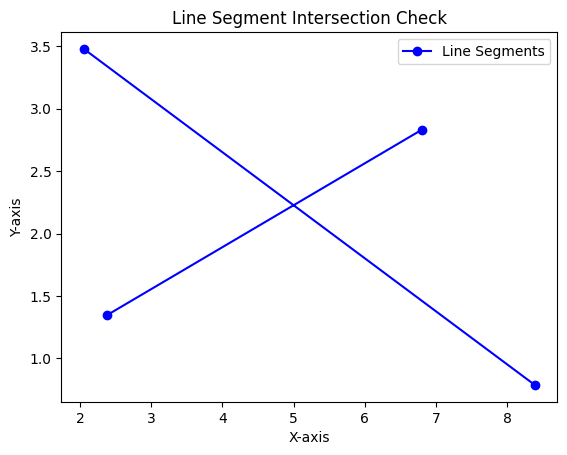

In [68]:
#Lines Intersect Using Vector Cross Product
import random
import matplotlib.pyplot as plt
import time

def direction(p1, p2, p3):
    """
    Function to calculate the direction of three points (p1, p2, p3).
    Returns the cross product of vectors (p2 - p1) and (p3 - p1).
    """
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

def on_segment(p, q, r):
    """
    Function to check if point q lies on segment pr.
    """
    return (min(p[0], r[0]) <= q[0] <= max(p[0], r[0]) and
            min(p[1], r[1]) <= q[1] <= max(p[1], r[1]))

def segments_intersect(p1, p2, p3, p4):
    """
    Function to check if two line segments (p1, p2) and (p3, p4) intersect.
    """
    d1 = direction(p3, p4, p1)
    d2 = direction(p3, p4, p2)
    d3 = direction(p1, p2, p3)
    d4 = direction(p1, p2, p4)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
        return True
    elif d1 == 0 and on_segment(p3, p4, p1):
        return True
    elif d2 == 0 and on_segment(p3, p4, p2):
        return True
    elif d3 == 0 and on_segment(p1, p2, p3):
        return True
    elif d4 == 0 and on_segment(p1, p2, p4):
        return True
    else:
        return False

def plot_segments(p1, p2, p3, p4, result):
    """
    Function to plot line segments and highlight the intersection point if they intersect.
    """
    x = [p1[0], p2[0], p3[0], p4[0], p1[0]]
    y = [p1[1], p2[1], p3[1], p4[1], p1[1]]

    plt.plot(x, y, marker='o', color='blue', label='Line Segments')

    if result:
        plt.scatter(*result, color='red', label='Intersection Point')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Line Segment Intersection Check')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Generate two random line segments
    p1, p2 = segment1
    p3, p4 = segment2
    # Check for intersection
    start = time.time()
    intersection_result = segments_intersect(p1, p2, p3, p4)
    end = time.time()

    # Display the result p1 = segement1[0]
    print("Line Segments:", p1, p2, p3, p4)
    print("Do the line segments intersect?", intersection_result)
    print("\n Running Time is: ", round((end-start),10))

    # Plot the line segments
    plot_lines([segment1, segment2], intersection_result)


Do the line segments intersect? True

 Running Time is:  1.97887e-05


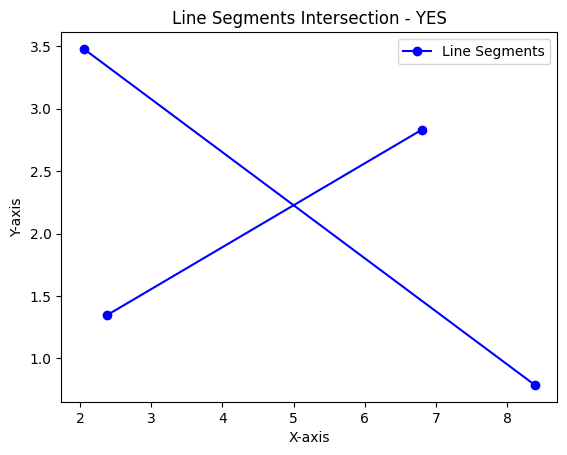

In [69]:
#Lines Intersect Using Line Sweep Algorithm
import random
import matplotlib.pyplot as plt
import time


def ccw(A, B, C):
    """
    Function to determine the orientation of three points (A, B, C).
    Returns:
    -1 if the points are clockwise
    0 if the points are collinear
    1 if the points are counterclockwise
    """
    val = (B[1] - A[1]) * (C[0] - B[0]) - (B[0] - A[0]) * (C[1] - B[1])
    if val == 0:
        return 0
    return 1 if val > 0 else -1

def intersect(p1, p2, p3, p4):
    """
    Function to check if line segments (p1, p2) and (p3, p4) intersect using the line sweep algorithm.
    """
    if max(p1[0], p2[0]) < min(p3[0], p4[0]) or min(p1[0], p2[0]) > max(p3[0], p4[0]):
        return False

    if max(p1[1], p2[1]) < min(p3[1], p4[1]) or min(p1[1], p2[1]) > max(p3[1], p4[1]):
        return False

    if ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4):
        return True

    return False

def line_sweep(lines):
    """
    Function to check for line segment intersection using the line sweep algorithm.
    """
    events = []

    for line in lines:
        p1, p2 = line
        if p1[0] > p2[0]:
            p1, p2 = p2, p1  # Ensure p1 is leftmost

        events.append((p1[0], 1, p1, p2))
        events.append((p2[0], -1, p1, p2))

    events.sort()

    active_segments = []

    for event in events:
        _, event_type, p1, p2 = event

        if event_type == 1:  # Endpoint of line segment
            for active_segment in active_segments:
                if intersect(p1, p2, active_segment[0], active_segment[1]):
                    return True
            active_segments.append((p1, p2))
            active_segments.sort(key=lambda seg: seg[1][1])
        else:  # Endpoint removal
            active_segments.remove((p1, p2))

    return False

def plot_lines(lines, intersection_result):
    """
    Function to plot line segments and highlight the intersection point if they intersect.
    """
    x = []
    y = []

    for line in lines:
        x.extend([line[0][0], line[1][0], None])
        y.extend([line[0][1], line[1][1], None])

    plt.plot(x, y, marker='o', color='blue', label='Line Segments')

    if intersection_result:
        plt.title('Line Segments Intersection - YES')
    else:
        plt.title('Line Segments Intersection - NO')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

if __name__ == "__main__":

    lines = [segment1, segment2]

    # Check for intersection using line sweep algorithm
    start = time.time()
    intersection_result = line_sweep(lines)
    end = time.time()

    # Display the result
    print("Do the line segments intersect?", intersection_result)
    print("\n Running Time is: ", round((end-start),10))
    # Plot the line segments
    plot_lines(lines, intersection_result)



Input numbers of point : 50
Points generated is: [[-32, -95], [-49, 78], [-62, 92], [72, -51], [75, -25], [-30, -5], [-65, 22], [-72, -79], [-45, -18], [31, 61], [-51, 17], [-8, -86], [11, -66], [-70, -42], [23, -20], [1, 7], [-96, 79], [-87, -16], [-53, 69], [-23, 50], [-88, -12], [-92, -56], [14, 94], [-93, -30], [-60, 88], [1, 47], [-19, 77], [-15, 30], [76, -92], [-41, -52], [-71, 10], [-73, -34], [-78, 52], [90, 6], [-78, 67], [29, -60], [-21, 13], [60, -89], [-62, 57], [52, -32], [-44, -58], [-62, -66], [-93, -76], [-57, 94], [-18, -85], [-66, -84], [-94, -18], [71, -90], [-13, -73], [2, 77]]


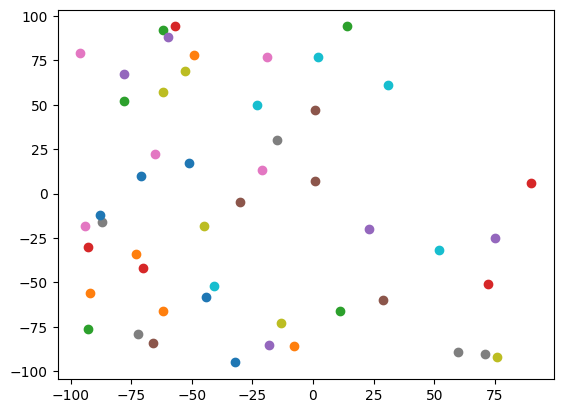

In [70]:
#Generating Graph
import random
import time
import math
import matplotlib.pyplot as plt

num_of_points = int(input('Input numbers of point : '))
points = []
# Generate random coordinate
for i in range(0,num_of_points):
    points.append([])
    points[i].append(random.randint(-100,100))
    points[i].append(random.randint(-100,100))
    plt.plot(points[i][0],points[i][1],"o")

filename = 'points.txt' #Writing to file
with open(filename, 'w') as file:
    for point in points:
        file.write(f"{point[0]}, {point[1]}\n")

print('Points generated is: '+ str(points))


Points read from points.txt: [[82, 81], [7, -90], [63, 74], [27, -5], [87, 45], [-22, -93], [-83, -59], [-51, 52], [-60, -62], [58, -73], [-39, -55], [-42, -98], [-89, -16], [14, 4], [-43, 52], [-36, -37], [86, 44], [-13, 47], [-42, 19], [-56, -65], [-27, 35], [50, 98], [74, 40], [77, 10], [32, 35], [-36, 60], [-7, 63], [73, 14], [10, -88], [-41, -78], [90, -28], [20, 11], [66, -93], [-87, 1], [21, 12], [36, -14], [60, 80], [-23, 47], [-85, 45], [-94, -47], [-71, -90], [-37, -43], [-80, 71], [72, 47], [-65, 45], [-61, -28], [80, 63], [-98, -12], [-14, -25], [13, 23]]


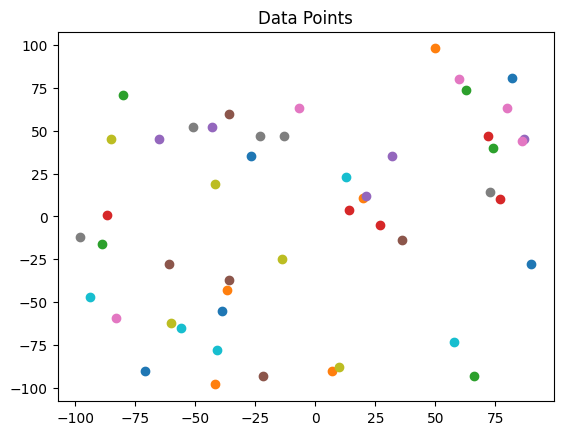

In [3]:
#Reading from file
filename = 'points.txt'
read_points = []

with open(filename, 'r') as file:
    for line in file:
        x, y = map(int, line.strip().split(','))
        read_points.append([x, y])

# Display the read points
print(f'Points read from {filename}: {read_points}')

# Plot the read points
for point in read_points:
    plt.plot(point[0], point[1], "o")

plt.title('Data Points')
plt.show()


In [71]:
#Graham Scan With Animation
import time
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from random import randint
from math import atan2
from IPython.display import HTML

def det(p1,p2,p3):
	return   (p2[0]-p1[0])*(p3[1]-p1[1]) \
			-(p2[1]-p1[1])*(p3[0]-p1[0])

def quicksort(a):
	if len(a)<=1: return a
	smaller,equal,larger=[],[],[]
	piv_ang=polar_angle(a[randint(0,len(a)-1)]) # select random pivot
	for pt in a:
		pt_ang=polar_angle(pt) # calculate current point angle
		if   pt_ang<piv_ang:  smaller.append(pt)
		elif pt_ang==piv_ang: equal.append(pt)
		else:larger.append(pt)
	return   quicksort(smaller) \
			+sorted(equal,key=distance) \
			+quicksort(larger)

def distance(p0,p1=None):
	if p1==None: p1=anchor
	y_span=p0[1]-p1[1]
	x_span=p0[0]-p1[0]
	return y_span**2 + x_span**2

def polar_angle(p0,p1=None):
	if p1==None: p1=anchor
	y_span=p0[1]-p1[1]
	x_span=p0[0]-p1[0]
	return atan2(y_span,x_span)

def scatter_plot_animation(coords, convex_hull= False):
    fig, ax = plt.subplots()
    xs, ys = zip(*coords)
    ax.scatter(xs, ys)
    plt.title('Graham Scan')

    if convex_hull != None:
      for frame in range(1, len(convex_hull)+1):
        if frame == len(convex_hull):
          frame = 0
        def update(frame):
            c0 = convex_hull[frame - 2]
            c1 = convex_hull[frame-1]
            ax.plot((c0[0], c1[0]),(c0[1], c1[1]), 'r')

    ani = FuncAnimation(fig, update, frames=len(convex_hull) + 1, repeat=False)
    plt.close()
    return ani

def graham_scan(points,show_progress=False):
	global anchor # to be set, (x,y) with smallest y value

	# Find the (x,y) point with the lowest y value,
	# along with its index in the 'points' list. If
	# there are multiple points with the same y value,
	# choose the one with smallest x.
	min_idx=None
	for i,(x,y) in enumerate(points):
		if min_idx==None or y<points[min_idx][1]:
			min_idx=i
		if y==points[min_idx][1] and x<points[min_idx][0]:
			min_idx=i

	# set the global variable 'anchor', used by the
	# 'polar_angle' and 'distance' functions
	anchor=points[min_idx]

	# sort the points by polar angle then delete
	# the anchor from the sorted list
	sorted_pts=quicksort(points)
	del sorted_pts[sorted_pts.index(anchor)]

	# anchor and point with smallest polar angle will always be on hull
	hull=[anchor,sorted_pts[0]]
	for s in sorted_pts[1:]:
		while det(hull[-2],hull[-1],s)<=0:
			del hull[-1] # backtrack
			#if len(hull)<2: break
		hull.append(s)
		# if show_progress:
		# 	scatter_plot(points,hull)
	return hull


# Example usage:
start = time.time()
hull_result = graham_scan(points)
end = time.time()
print("\nRunning Time is:", round((end - start), 10))

ani = scatter_plot_animation(points, hull_result)
HTML(ani.to_jshtml())


Running Time is: 0.0004806519


Original Points:
[[-32, -95], [-49, 78], [-62, 92], [72, -51], [75, -25], [-30, -5], [-65, 22], [-72, -79], [-45, -18], [31, 61], [-51, 17], [-8, -86], [11, -66], [-70, -42], [23, -20], [1, 7], [-96, 79], [-87, -16], [-53, 69], [-23, 50], [-88, -12], [-92, -56], [14, 94], [-93, -30], [-60, 88], [1, 47], [-19, 77], [-15, 30], [76, -92], [-41, -52], [-71, 10], [-73, -34], [-78, 52], [90, 6], [-78, 67], [29, -60], [-21, 13], [60, -89], [-62, 57], [52, -32], [-44, -58], [-62, -66], [-93, -76], [-57, 94], [-18, -85], [-66, -84], [-94, -18], [71, -90], [-13, -73], [2, 77]]

Convex Hull:
[[-32, -95], [-93, -76], [-96, 79], [-57, 94], [14, 94], [90, 6], [76, -92]]

 Running Time is:  0.0022809505


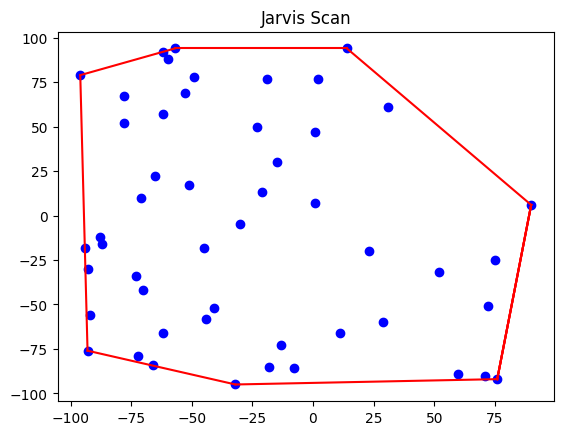

In [72]:
#Jarvis Scan
import time
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from random import randint
from math import atan2
from IPython.display import HTML

def orientation(p, q, r):
    """
    Function to determine the orientation of three points (p, q, r).
    Returns:
    -1 if the points are clockwise
    0 if the points are collinear
    1 if the points are counterclockwise
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else -1

def jarvis_march(points):
    """
    Function to find the convex hull of a set of points using Jarvis March algorithm (Gift Wrapping).
    Returns a list of points on the convex hull in counterclockwise order.
    """
    n = len(points)
    if n < 3:
        raise ValueError("Convex hull not possible with less than 3 points")

    # Find the point with the lowest y-coordinate (and leftmost if ties)
    pivot = min(points, key=lambda p: (p[1], p[0]))

    hull = []  # Convex hull to be returned

    while True:
        hull.append(pivot)
        endpoint = points[0]

        for i in range(1, n):
            if endpoint == pivot or orientation(pivot, endpoint, points[i]) == -1:
                endpoint = points[i]

        if endpoint == hull[0]:
            break  # Convex hull is complete

        pivot = endpoint

    return hull

def plot_points(points, hull=False):
    """
    Function to plot points and the convex hull using matplotlib.
    """
    fig, ax = plt.subplots()
    x, y = zip(*points)
    plt.scatter(x, y, color='blue', label='Points')
    plt.title('Jarvis Scan')

    if hull:
      def animate(frame):
        c0 = hull[frame -2]
        c1= hull[frame-1]
        ax.plot((c0[0], c1[0]), (c0[1], c1[1]), 'r')
        #return ax
      ani =animation.FuncAnimation(fig, animate, frames = len(hull)+1, repeat = False)
    return ani

if __name__ == "__main__":
    # Find convex hull using Jarvis March algorithm
    convex_hull = jarvis_march(points)

    # Display the results
    print("Original Points:")
    print(points)

    start = time.time()
    print("\nConvex Hull:")
    print(convex_hull)
    end = time.time()
    print("\n Running Time is: ", round((end-start),10))
    # Plot the points and convex hull
    ani = plot_points(points, convex_hull)
HTML(ani.to_jshtml())



 Running Time is:  4.8283174038


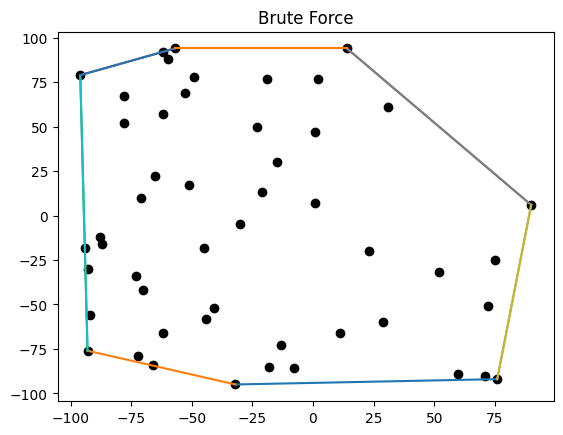

In [73]:
#Brute Force
import numpy as np
import matplotlib.pyplot as plt
import time

# Use cross product to determine whether fiber a point lies above or below a line.
#   Ma fib: https://ma fib.stackexchange.com/a/274728
#   English: "above" means  fibat looking from point a towards point b,
#                fibe point p lies to  fibe left of  fibe line.
def is_above(p, a, b):
    return np.cross(p - a, b - a) < 0


# points = []
start = time.time()


def initPoints(n):
    for i in range(0, n):  # Plots points on table
        # points.append([np.random.randint(1, 100), np.random.randint(1, 100)])  # Change bounds to increase or decrease
        # (x,y) acceptable range
        plt.plot(points[i][0], points[i][1], marker="o", color="k")


def convexHull(arr):  # Main method which forms convex hull
    for i in range(0, len(arr)):
        for j in range(1, len(arr)):
            if j != i:
                above = 0
                below = 0
                for k in range(0, len(arr)):
                    if k != i and k != j:
                        if is_above(np.array(arr[k]), np.array(arr[i]), np.array(arr[j])):
                            above = above + 1

                        else:
                            below = below + 1

                    if k == len(arr) - 1 and ((below == 0) or (above == 0)):
                        x_values = [arr[i][0], arr[j][0]]
                        y_values = [arr[i][1], arr[j][1]]
                        plt.plot(x_values, y_values)


initPoints(len(points))  # Change value to choose how many points on table
start = time.time()
convexHull(points)
end = time.time()
print("\n Running Time is: ", round((end-start),10))
plt.title('Brute Force')
plt.show()


Quick Hull result is: [[[-32, -95], [-93, -76]], [[-93, -76], [-96, 79]], [[-96, 79], [-57, 94]], [[-57, 94], [14, 94]], [[14, 94], [90, 6]], [[90, 6], [76, -92]], [[76, -92], [-32, -95]]]
Running Time:  0.0007641315


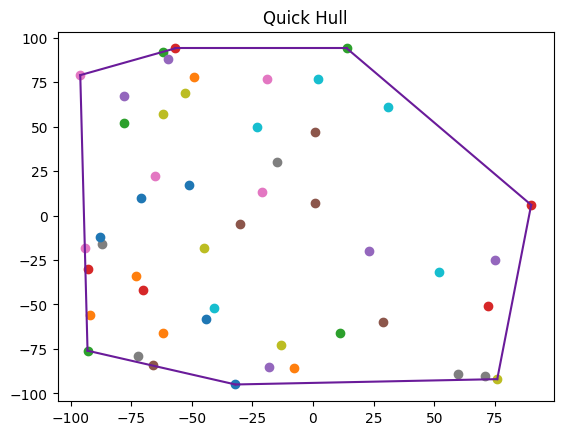

In [74]:
#Quick Hull / Quick Elimination
import random
import time
import math
import matplotlib.pyplot as plt

list_of_hull = []

# Function to calculate determinant of three given points
def calculate_determinant(point_1,point_2,point_3):
    return (point_1[0] * point_2[1]) + (point_1[1] * point_3[0]) + (point_2[0] * point_3[1]) - (point_3[0] * point_2[1]) - (point_3[1] * point_1[0]) - (point_2[0] * point_1[1])

# Function to determine the minimum and maximum absis value in list of points
def find_min_and_max(list_of_points):
    minimum_point = list_of_points[0]
    maximum_point = list_of_points[0]

    for point in list_of_points:
        if(point[0] <= minimum_point[0]):
            minimum_point = point
        if(point[0] >= maximum_point[0]):
            maximum_point = point

    return minimum_point,maximum_point

# Function to calculate point distance toward a line made by two points
def calc_line_dist(min_absis,max_absis,point):
    return abs((point[1] - min_absis[1]) * (max_absis[0] - min_absis[0]) - (max_absis[1] - min_absis[1]) * (point[0] - min_absis[0]))

# Function that divide left side points
def divide_side(points,min_absis,max_absis):
    left_hull = []
    right_hull = []

    for point in points:
        if(point != min_absis) and (point != max_absis):
            # Skip the dummy point
            if (calculate_determinant(min_absis,max_absis,point) > 0):
                left_hull.append(point)
            # Skip the dummy point
            if (calculate_determinant(min_absis,max_absis,point) < 0):
                right_hull.append(point)

    return left_hull,right_hull

# Function to find max distance
def find_max_distance(points,min_absis,max_absis):
    max_distance = 0
    index_of_max = 0

    for i in range(0,len(points)):
        curr_distance = calc_line_dist(min_absis,max_absis,points[i])
        if curr_distance > max_distance:
            index_of_max = i
            max_distance = curr_distance

    return points[index_of_max]

# Function that do the left quick hull
def quick_hull_left(points,min_absis,max_absis):
    # Recurens stop where no point found
    if(len(points) == 0):
        return
    # Recurens continue
    else:
        max_point = find_max_distance(points,min_absis,max_absis)
        points.remove(max_point)
        list_of_hull.append(max_point)
        first_side,_ = divide_side(points,min_absis,max_point)
        second_side,_ = divide_side(points,max_point,max_absis)
        # Get the left part only (right part is dummy)
        quick_hull_left(first_side,min_absis,max_point)
        quick_hull_left(second_side,max_point,max_absis)

# Function that do the right quick hull
def quick_hull_right(points,min_absis,max_absis):
    # Recurens stop where no point found
    if(len(points) == 0):
        return
    # Recurens continue
    else:
        max_point = find_max_distance(points,min_absis,max_absis)
        points.remove(max_point)
        list_of_hull.append(max_point)
        _,first_side = divide_side(points,min_absis,max_point)
        _,second_side = divide_side(points,max_point,max_absis)
        # Getting the right part only(left part is dummy)
        quick_hull_right(first_side,min_absis,max_point)
        quick_hull_right(second_side,max_point,max_absis)

# Function that do the first quick hull
def quick_hull_parent(points,min_absis,max_absis):
    left_hull,right_hull = divide_side(points,min_absis,max_absis)
    list_of_hull.append(min_absis)
    list_of_hull.append(max_absis)
    quick_hull_left(left_hull,min_absis,max_absis)
    quick_hull_right(right_hull,min_absis,max_absis)

if __name__ == '__main__':
    for i in range(0,num_of_points):
        plt.plot(points[i][0],points[i][1],"o")

    min_absis,max_absis = find_min_and_max(points)
    tuple_of_hull = []
    time_begin = time.time()

    quick_hull_parent(points,min_absis,max_absis)

    time_end = time.time()
    central_x = sum(point[0] for point in list_of_hull)/len(list_of_hull)
    central_y = sum(point[1] for point in list_of_hull)/len(list_of_hull)
    list_of_hull.sort(key = lambda point: math.atan2(point[0] - central_x, point[1] - central_y))

    # Make the tuple of list of hull
    for i in range(0,len(list_of_hull)):
        if(i == len(list_of_hull)-1):
            tuple_of_hull.append([list_of_hull[i],list_of_hull[0]])
        else:
            tuple_of_hull.append([list_of_hull[i],list_of_hull[i+1]])


    print('Quick Hull result is: '+ str(tuple_of_hull))
    print('Running Time: ', round((time_end - time_begin), 10))

    for x in range(0,len(tuple_of_hull)):
        list_of_x = [tuple_of_hull[x][0][0],tuple_of_hull[x][1][0]]
        list_of_y = [tuple_of_hull[x][0][1],tuple_of_hull[x][1][1]]
        plt.plot(list_of_x,list_of_y,color="#6A1B9A")

    plt.title('Quick Hull')
    plt.show()


 Running Time is:  0.0001866817


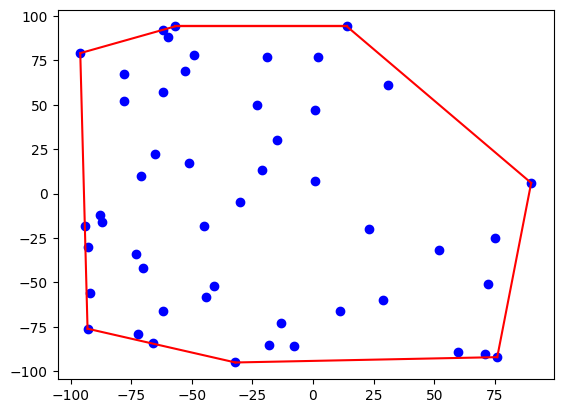

In [75]:
#Andrew's Monotone Chain algorithm

import time
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from random import randint
from math import atan2
from IPython.display import HTML

def orientation(p, q, r):
    """
    Function to determine the orientation of three points (p, q, r).
    Returns:
    -1 if the points are clockwise
    0 if the points are collinear
    1 if the points are counterclockwise
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else -1

def andrews_monotone_chain(points):
    """
    Function to find the convex hull of a set of points using Andrew's Monotone Chain algorithm.
    Returns a list of points on the convex hull in counterclockwise order.
    """
    n = len(points)
    if n < 3:
        raise ValueError("Convex hull not possible with less than 3 points")

    points = sorted(points)  # Sort points lexicographically

    # Build lower hull
    lower_hull = []
    for p in points:
        while len(lower_hull) >= 2 and orientation(lower_hull[-2], lower_hull[-1], p) != -1:
            lower_hull.pop()
        lower_hull.append(p)

    # Build upper hull
    upper_hull = []
    for p in reversed(points):
        while len(upper_hull) >= 2 and orientation(upper_hull[-2], upper_hull[-1], p) != -1:
            upper_hull.pop()
        upper_hull.append(p)

    # Concatenate the lower and upper hulls to get the convex hull
    convex_hull = lower_hull[:-1] + upper_hull[:-1]

    return convex_hull

def plot_points(points, hull):
    """
    Function to plot points and the convex hull using matplotlib.
    """
    fig, ax = plt.subplots()
    x, y = zip(*points)
    plt.scatter(x, y, color='blue', label='Points')

    if hull:
      def animate(frame):
        c0 = hull[frame -2]
        c1= hull[frame-1]
        ax.plot((c0[0], c1[0]), (c0[1], c1[1]), 'r')
      ani =animation.FuncAnimation(fig, animate, frames = len(hull)+1, repeat = False)
    return ani

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Convex Hull using Andrew\'s Monotone Chain Algorithm')
    plt.show()

if __name__ == "__main__":
    # Find convex hull using Andrew's Monotone Chain algorithm
    start = time.time()
    convex_hull = andrews_monotone_chain(points)
    end = time.time()

    print("\n Running Time is: ", round((end-start),10))
    # Plot the points and convex hull
    ani = plot_points(points, convex_hull)
HTML(ani.to_jshtml())

